In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0,20,0.4)
y1 = np.sin(x)
y2 = np.cos(x)*50


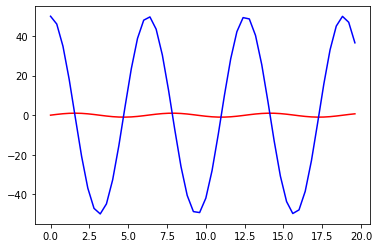

In [3]:
plt.plot(x,y1,'red')
plt.plot(x,y2,'blue')

### Absolute Maximum Scaling

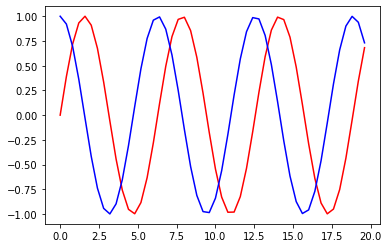

In [4]:
#Scaling
y1_new = y1/max(y1)
y2_new = y2/max(y2)
plt.plot(x,y1_new,'red')
plt.plot(x,y2_new,'blue')

### Min-Max Scaling

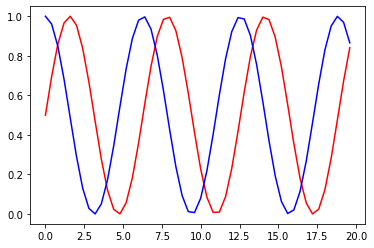

In [5]:
y1_new = (y1-min(y1))/(max(y1)-min(y1))
y2_new = (y2-min(y2))/(max(y2)-min(y2))
plt.plot(x,y1_new,'red')
plt.plot(x,y2_new,'blue')

### NOrmalization

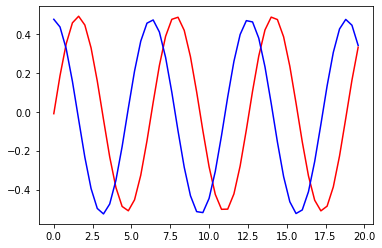

In [6]:
y1_new = (y1-np.mean(y1))/(max(y1)-min(y1))
y2_new = (y2-np.mean(y2))/(max(y2)-min(y2))
plt.plot(x,y1_new,'red')
plt.plot(x,y2_new,'blue')

### Standardization

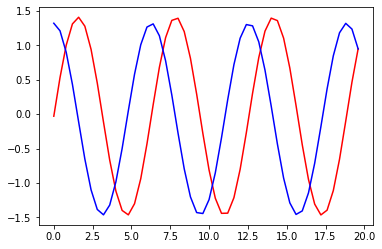

In [7]:
y1_new = (y1-np.mean(y1))/np.std(y1)
y2_new = (y2-np.mean(y2))/np.std(y2)
plt.plot(x,y1_new,'red')
plt.plot(x,y2_new,'blue')

### RObust Scaling

In [8]:
from scipy import stats 
IQR1 = stats.iqr(y1, interpolation = 'midpoint') 
y1_new = (y1-np.median(y1))/IQR1
IQR2 = stats.iqr(y2, interpolation = 'midpoint') 
y2_new = (y2-np.median(y2))/IQR2

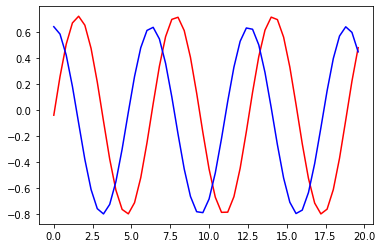

In [9]:
plt.plot(x,y1_new,'red')
plt.plot(x,y2_new,'blue')

### Real Time Problem

In [21]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Purushotham\Desktop\deloitte\eda\datasets\admission_predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
df.drop("Serial No.", axis=1, inplace=True)

In [23]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [24]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
y = df['Chance of Admit ']

In [26]:
df.drop('Chance of Admit ', axis=1, inplace=True)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [41]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [42]:
from sklearn import metrics

In [43]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
rmse

0.0678797833332233

### Transformation

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()

In [46]:
sc.fit(df)

StandardScaler()

In [47]:
df = sc.transform(df)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [49]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [50]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
rmse

0.05733160996775765